XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Data Set:

Below are the four datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users


Time period of data is from 31/01/2016 to 31/12/2018

In [1]:
 pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling/Cleaning

In [3]:
cab_df = pd.read_csv("../data/Cab_Data.csv")
city_df = pd.read_csv("../data/City.csv")
cust_df = pd.read_csv("../data/Customer_ID.csv")
trans_df = pd.read_csv("../data/Transaction_ID.csv")

In [4]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
cust_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
trans_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
cab_df.shape, city_df.shape, cust_df.shape, trans_df.shape

((359392, 7), (20, 3), (49171, 4), (440098, 3))

merging files into one single file

In [9]:
df = cab_df.merge(trans_df, on='Transaction ID').merge(cust_df, on='Customer ID').merge(city_df, on='City')

In [10]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [11]:
df.shape

(359392, 14)

There are 359392 rows

In [12]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

###### There is no missing data in dataset

In [13]:
df_dup = df.duplicated()
print(df_dup.sum())

0


###### There are no duplicate rows in dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


The attribute "Date of Travel" is a date field but its data type is of string. we will convert it to date time 

In [15]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

Derive Year and Month from date of travel.

In [16]:
df['travel_year'] = df['Date of Travel'].dt.year
df['travel_month'] = df['Date of Travel'].dt.month

Column Users and Population should be converted to integer.

In [17]:
df['Users'] = df['Users'].str.strip().str.replace(',','').astype(int)
df['Population'] = df['Population'].str.strip().str.replace(',','').astype(int)

Lets calculate profit and profit per KM.

In [18]:
df["profit"] = df["Price Charged"] - df["Cost of Trip"]
df["profit_per_km"] = df["profit"].sum()/df["KM Travelled"].sum()

In [19]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,travel_year,travel_month,profit,profit_per_km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,57.3150,6.081963
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,281.2772,6.081963
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,194.6480,6.081963
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,23.6660,6.081963
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,253.9808,6.081963


## EDA : Exploratory Data Analysis

## Univariate Analysis
- Categorical Variables → Bar chart
- Numerical Variables → Histogram

##### Which cab Company is popular?

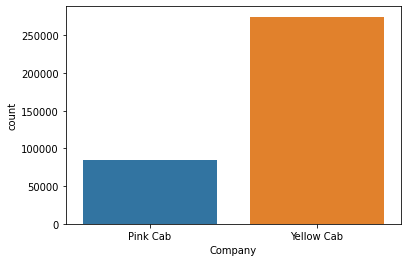

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


In [20]:
x = df['Company']
sns.countplot(x=x)
plt.show()
print(x.value_counts())

In [21]:
(274681/(274681+84711))*100

76.4293584720862

People seems to use yellow cab more than pink cab. Cab dataset has 76.42% of transactions for yellow cab.

##### Which city shows maximum number of ride transactions?

<AxesSubplot:>

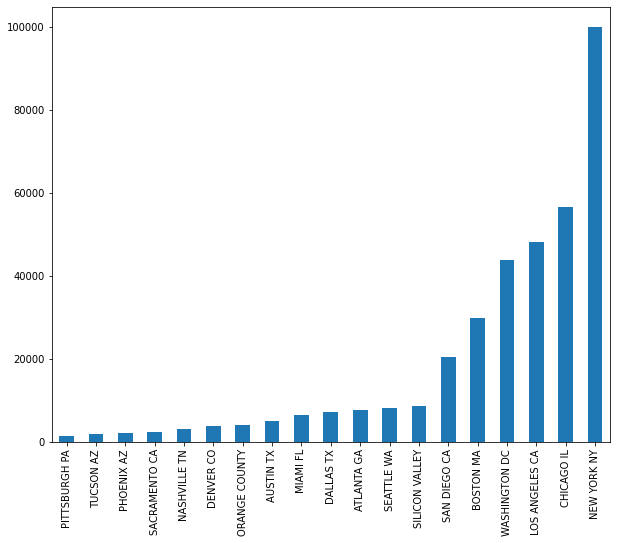

In [22]:
plt.figure(figsize=(10,8))
df['City'].value_counts().sort_values().plot(kind='bar')

Newyork city shows more rides and Pittsburgh shows lowest. 

##### Is there any certain time/month when people ride in cabs more?

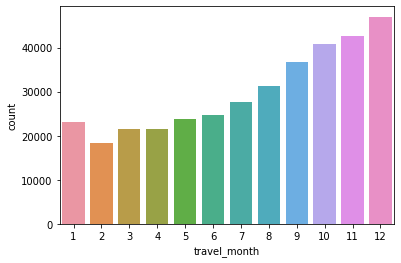

In [23]:
x = df['travel_month']
sns.countplot(x=x)
plt.show()

More cab transactions are seen during the end of the year.

##### Do male use rides more or female?

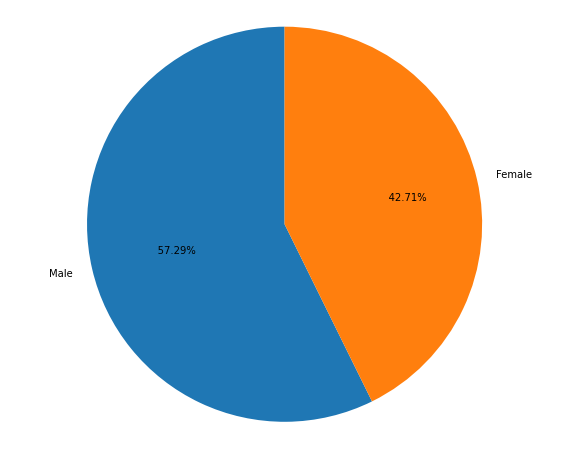

In [24]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
labels = ['Male', 'Female']
ax1.pie(df['Gender'].value_counts(),labels=labels, autopct='%10.2f%%',startangle=90)
ax1.axis('equal') 
plt.show()

Male travelers are more than Female

##### Which age group prople use cab service more?

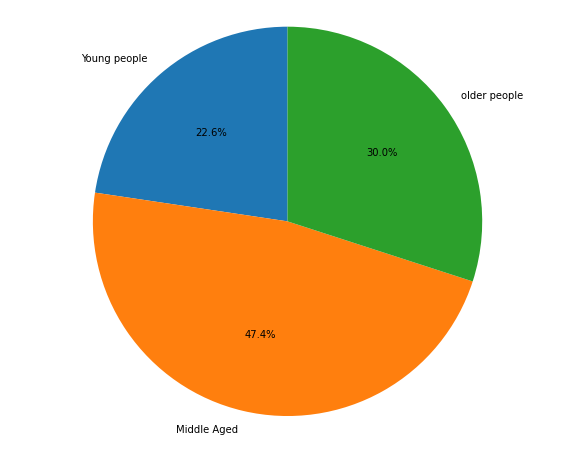

In [25]:
age_grp1 = df[(df["Age"] >= 18) & (df["Age"] < 25)].count()[0]
age_grp2 = df[(df["Age"] >= 25) & (df["Age"] < 40)].count()[0]
age_grp3 = df[(df["Age"] >= 40) & (df["Age"] <= 65)].count()[0]

ages = [age_grp1,age_grp2,age_grp3]

fig1, ax1 = plt.subplots(figsize=(10,8))
labels = ['Young people','Middle Aged','older people']
ax1.pie(ages,labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal') 
plt.show()

As seen above , middle aged people between 25 to 40 years , use the cab service more.

##### Which Payment_Mode is used more?

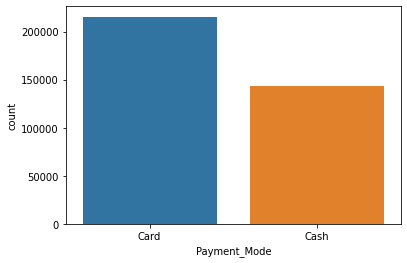

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64


In [26]:
x = df['Payment_Mode']
sns.countplot(x=x)
plt.show()
print(x.value_counts())

People prefer to pay by card than cash

## Multivariate Analysis

##### Ride count distribution by company in each city

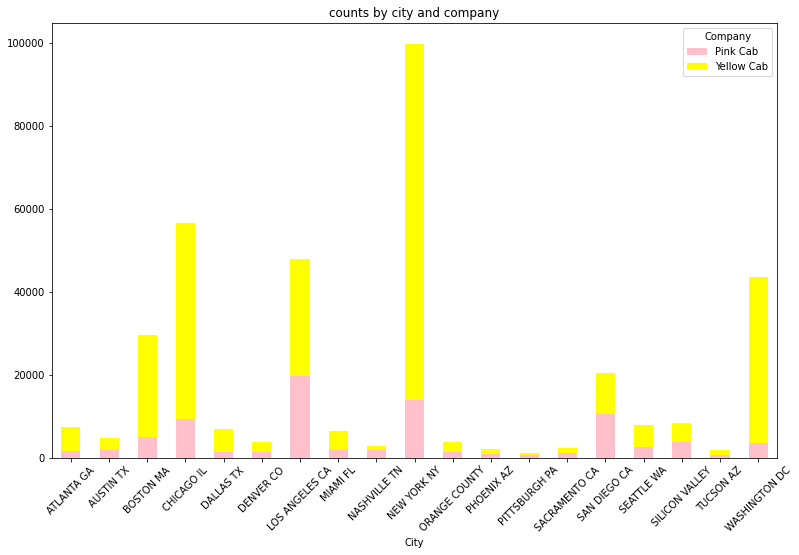

In [27]:
agg_cnt = df.groupby(['City','Company'])['Company'].count().unstack();
agg_cnt.plot(kind='bar', stacked=True,figsize=(13,8) , color=('pink','yellow'))
plt.title('counts by city and company')
plt.xticks(rotation=45, ha='center')
plt.show()

As seen above, more transactions/rides are seen for Yellow cabs in most of the cities.

##### Does Female and Male customers prefers certain kind of company?

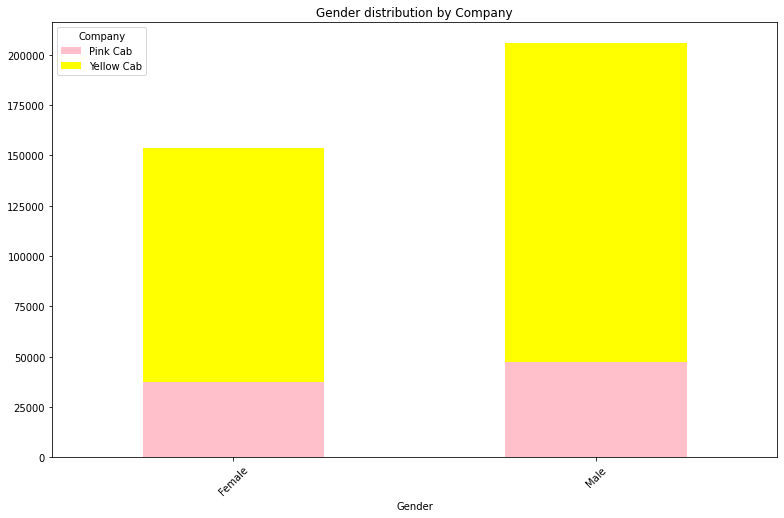

In [28]:
agg_gender_cnt = df.groupby(['Gender','Company'])['Company'].count().unstack();
agg_gender_cnt.plot(kind='bar', stacked=True,figsize=(13,8) , color=('pink','yellow'))
plt.title('Gender distribution by Company')
plt.xticks(rotation=45, ha='center')
plt.show()

Yellow cab service is prefered by male and female.

##### Ride Count distribution of company in each year

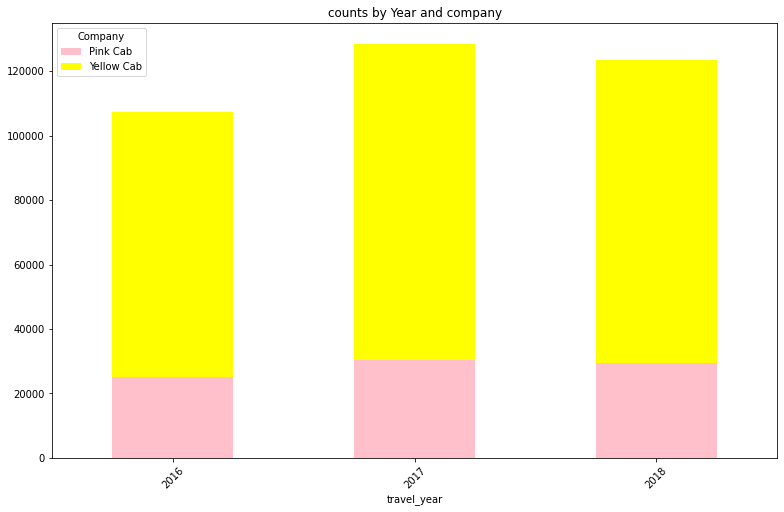

In [29]:
company_year_cnt = df.groupby(['travel_year','Company'])['Company'].count().unstack();
company_year_cnt.plot(kind='bar', stacked=True,figsize=(13,8) , color=('pink','yellow'))
plt.title('counts by Year and company')
plt.xticks(rotation=45, ha='center')
plt.show()

###### Cab rides were used more in 2017 and Yellow cab transactions are more tahan pink cab in all 3 years.

##### Customer distribution in each company by year

In [30]:
#cust_yr_cnt = df.groupby(['travel_year','Company'])['Customer ID'].count().unstack();
#cust_yr_cnt.plot(kind='bar', stacked=True,figsize=(13,8) , color=('pink','yellow'))
#plt.title('Number of customers per company')
#plt.ylabel('Number of customers')
#plt.xticks(rotation=45, ha='center')
#plt.show()
#print(agg_gender_cnt)

In [31]:
df['Customer ID'].count()

359392

In [32]:
# transforming the dataset for barplot
data_df = df.groupby(['travel_year','Company'])['Customer ID'].count()
  
data_df = data_df.reset_index()
print(data_df.head())

    107,319

   travel_year     Company  Customer ID
0         2016    Pink Cab        25080
1         2016  Yellow Cab        82239
2         2017    Pink Cab        30321
3         2017  Yellow Cab        98189
4         2018    Pink Cab        29310


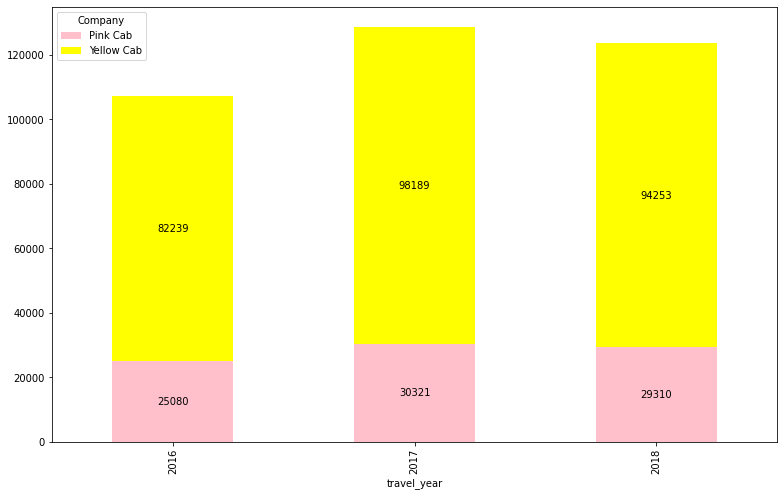

In [59]:
company_year_cnt = df.groupby(['travel_year','Company'])['Customer ID'].count().unstack();
#company_year_cnt.plot(kind='bar', stacked=True,figsize=(13,8) , color=('pink','yellow'))
#plt.title('customer counts in each company by year')
#plt.xticks(rotation=45, ha='center')
#plt.show()
#calculate the % for each age group 
#company_year_cnt
#percentage_dist = 100 * company_year_cnt.divide(company_year_cnt.sum(axis = 1), axis = 0)
percentage_dist =company_year_cnt
#percentage_dist.plot.bar(stacked=True)
ax = percentage_dist.plot.bar(stacked=True, figsize=(13,8),  color=('pink','yellow'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            #'{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

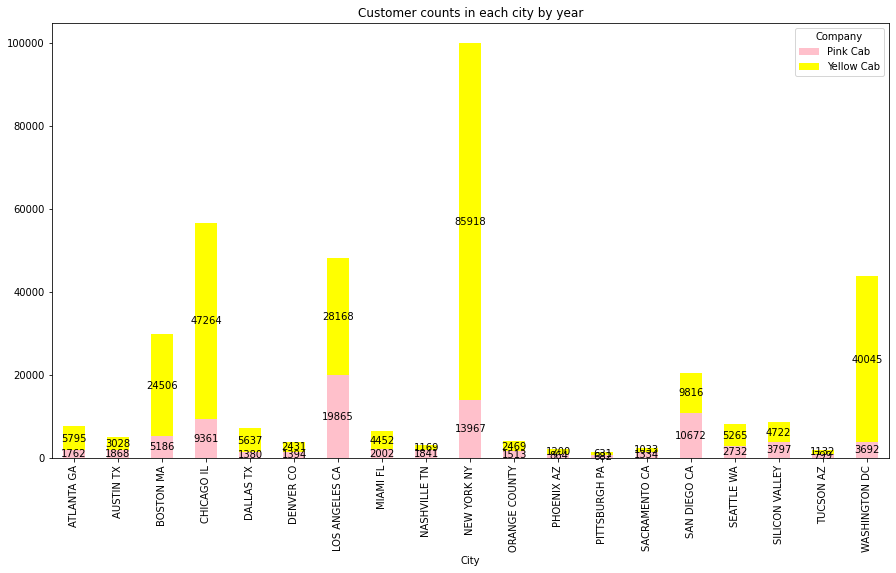

In [100]:
cust_city_comp_cnt = df.groupby(['City','Company'])['Customer ID'].count().unstack();
#company_year_cnt.plot(kind='bar', stacked=True,figsize=(13,8) , color=('pink','yellow'))

#plt.xticks(rotation=45, ha='center')
#plt.show()
#calculate the % for each age group 
cust_city_comp_cnt
#percentage_dist = 100 * cust_city_comp_cnt.divide(cust_city_comp_cnt.sum(axis = 1), axis = 0)
percentage_dist =cust_city_comp_cnt
#percentage_dist.plot.bar(stacked=True)
ax = percentage_dist.plot.bar(stacked=True,figsize=(15,8), color=('pink','yellow'))
ax.set_title('Customer counts in each city by year')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            #'{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

In [48]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [49]:
pip install -U matplotlib

In [101]:
df.groupby("Company")["profit"].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: profit, dtype: float64

In [102]:
df.groupby("Company")["profit_per_km"].mean()

Company
Pink Cab      6.081963
Yellow Cab    6.081963
Name: profit_per_km, dtype: float64

In [103]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,travel_year,travel_month,profit,profit_per_km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,57.3150,6.081963
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,281.2772,6.081963
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,194.6480,6.081963
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,23.6660,6.081963
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,253.9808,6.081963


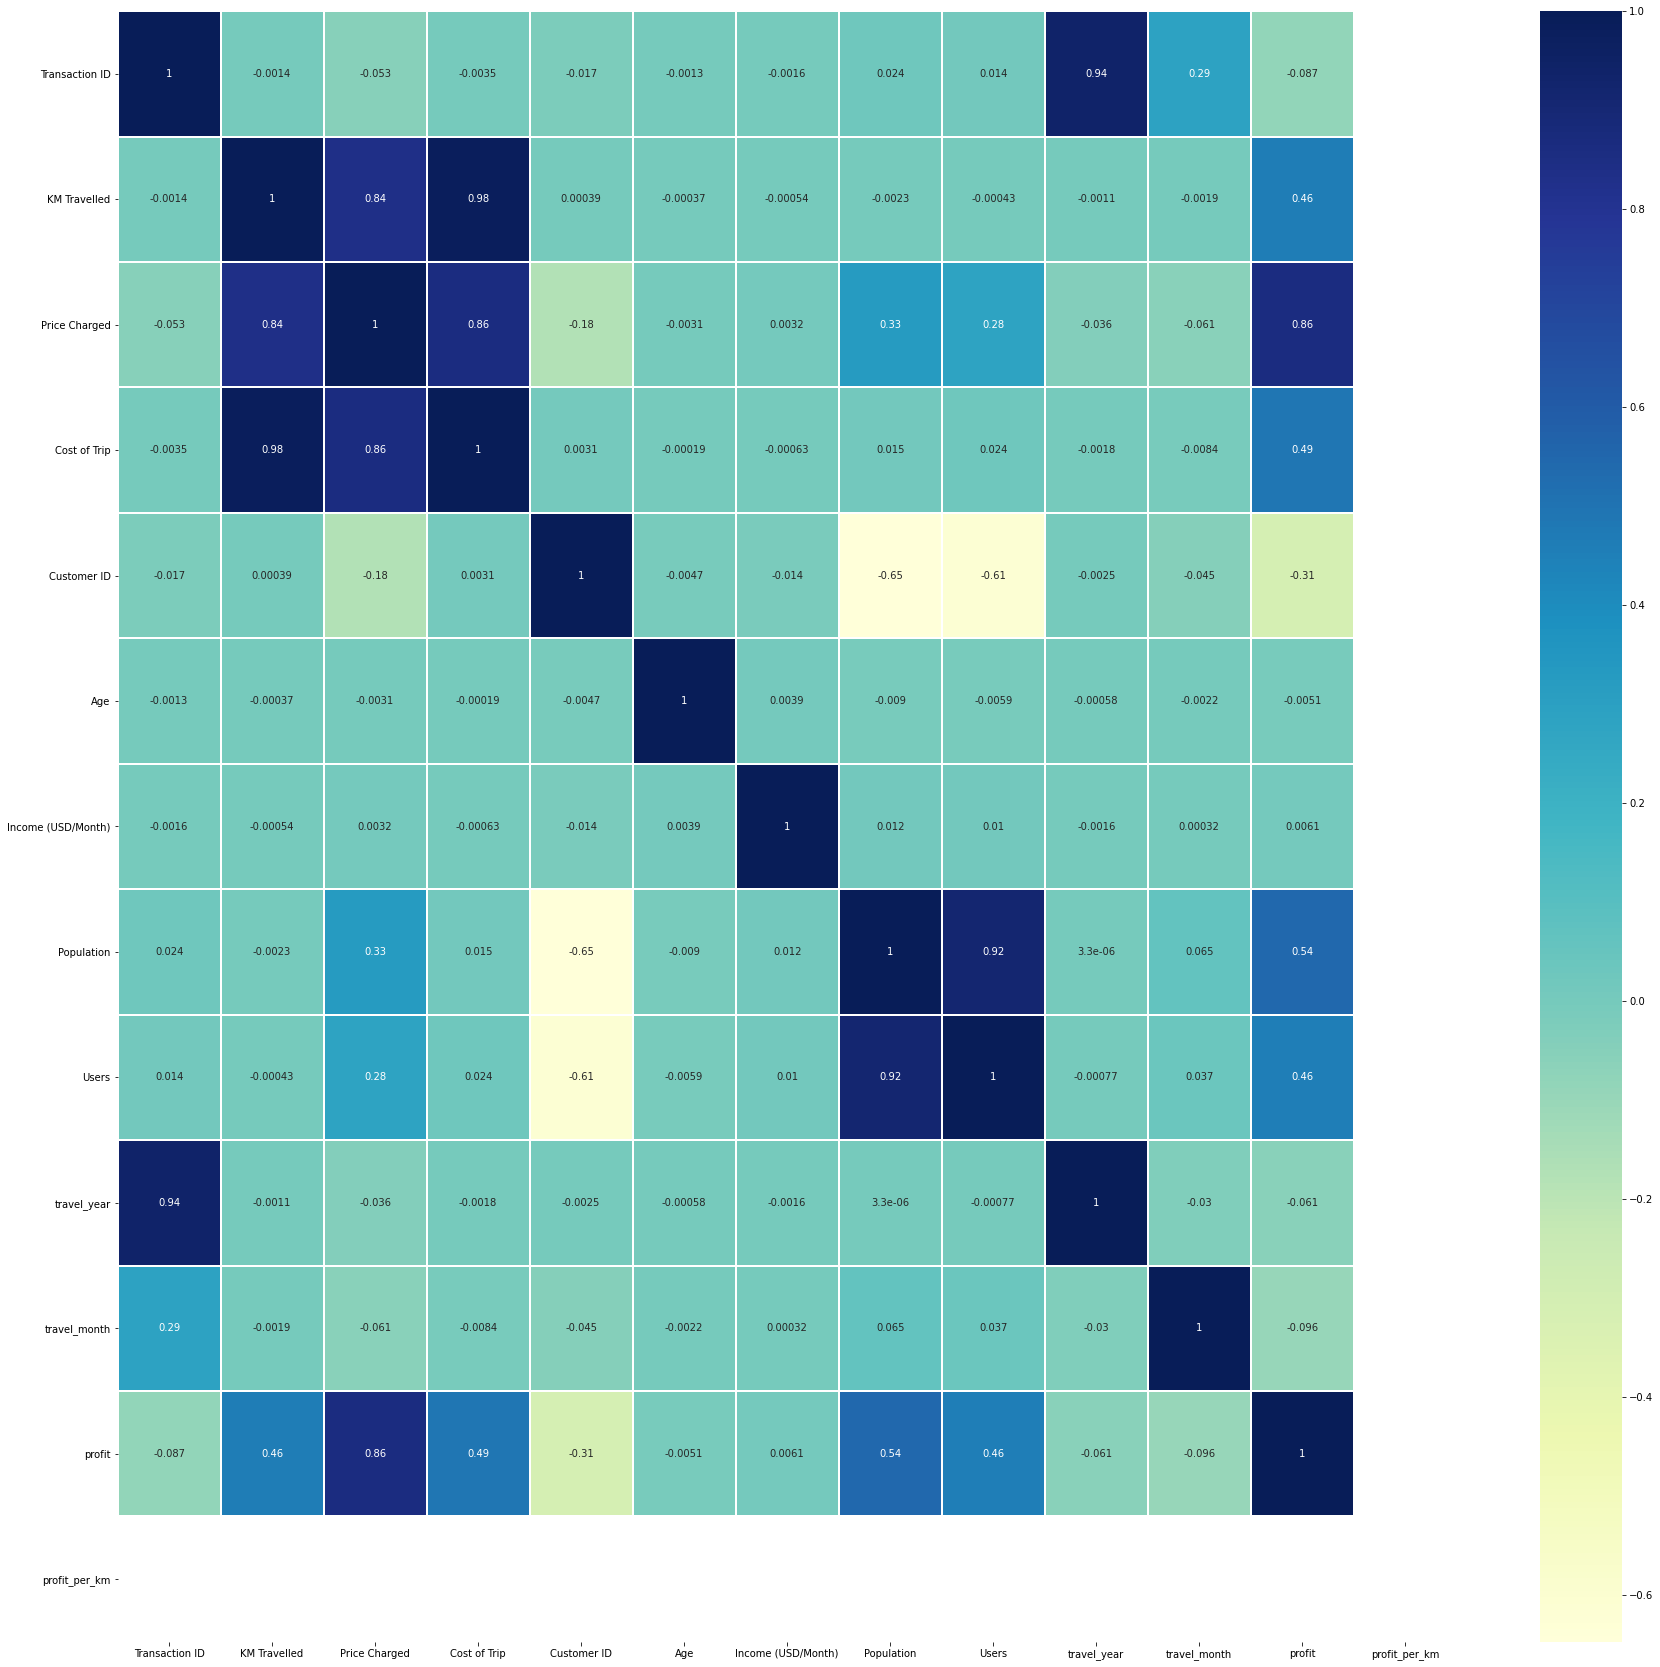

In [104]:
### create the correlation matrix heat map
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

The correlation map shows positive relation between 
1. KM travelled and profit, cost of trip, price charged
2. price charged and profit, cost of trip
3. users and population
4. users and profit
4. population and profit

In [105]:
features = ['KM Travelled','Company','Price Charged','Cost of Trip','Income (USD/Month)','Population', 'Users','profit']

In [106]:
new_df = df[features]

In [107]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,travel_year,travel_month,profit,profit_per_km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,57.3150,6.081963
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,281.2772,6.081963
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,194.6480,6.081963
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,23.6660,6.081963
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,253.9808,6.081963


##### Price distribution :

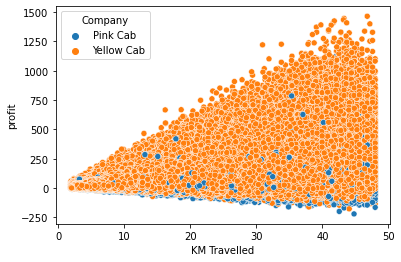

In [108]:
sns.scatterplot(x='KM Travelled', y = 'profit', data=df, hue="Company");

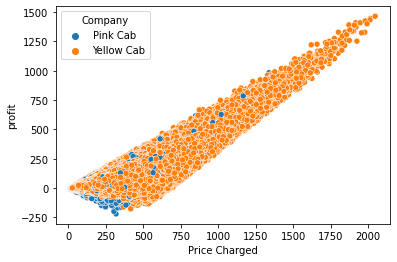

In [109]:
sns.scatterplot(x='Price Charged', y = 'profit', data=df, hue="Company");

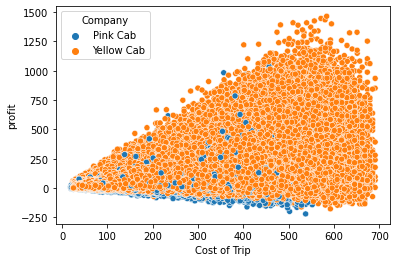

In [110]:
sns.scatterplot(x='Cost of Trip', y = 'profit', data=df, hue="Company");

In [111]:
df.groupby('City')['profit'].mean()

City
ATLANTA GA        111.477158
AUSTIN TX         107.577824
BOSTON MA          59.568883
CHICAGO IL         59.820104
DALLAS TX         160.856957
DENVER CO         103.943793
LOS ANGELES CA     91.847452
MIAMI FL          117.493220
NASHVILLE TN       49.678478
NEW YORK NY       279.947491
ORANGE COUNTY     114.766920
PHOENIX AZ         93.479109
PITTSBURGH PA      64.863638
SACRAMENTO CA      49.567466
SAN DIEGO CA       77.467955
SEATTLE WA         75.613962
SILICON VALLEY    154.561013
TUCSON AZ          72.636300
WASHINGTON DC      79.860762
Name: profit, dtype: float64

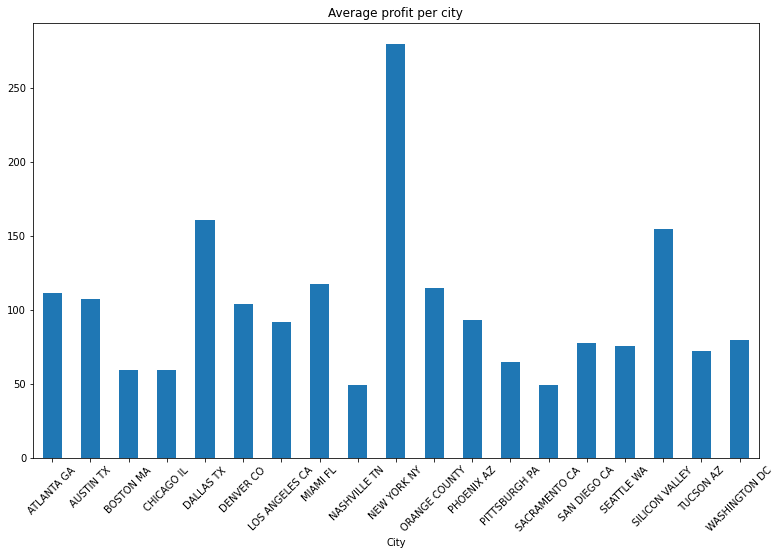

In [112]:
avg_profit_per_city = df.groupby('City')['profit'].mean()
avg_profit_per_city.plot(kind='bar',figsize=(13,8) )
plt.title('Average profit per city')
plt.xticks(rotation=45, ha='center')
plt.show()

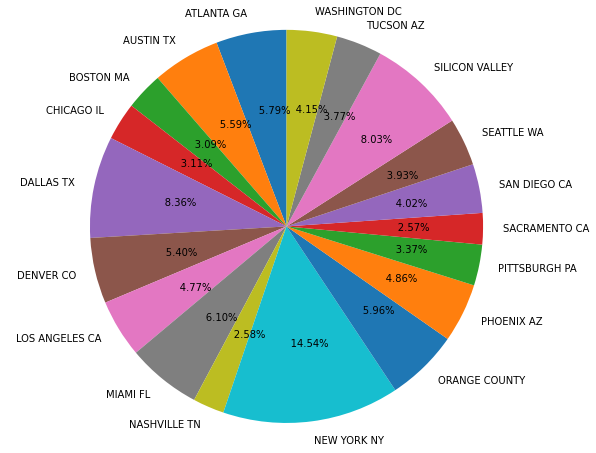

In [113]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
labels = df['City'].unique()
ax1.pie(avg_profit_per_city,labels=labels, autopct='%10.2f%%',startangle=90)
ax1.axis('equal') 
plt.show()

###### New York City shows maximum profit for cab business. 14.54% cab market is occupied by New york. Silicon Valley is on second number

In [114]:
total_profit_per_company = df.groupby('Company')['profit'].sum()

In [115]:
total_profit_per_company

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: profit, dtype: float64

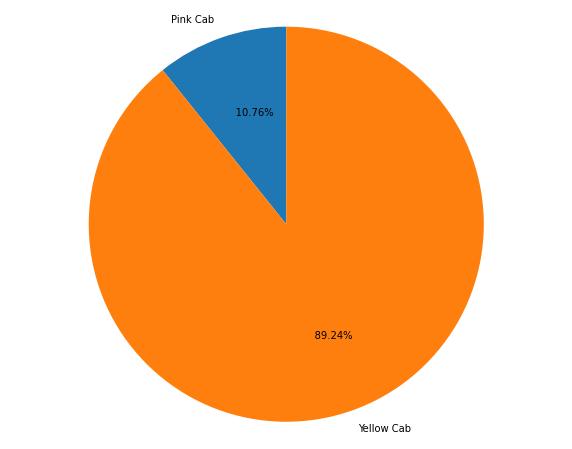

In [116]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
labels = df['Company'].unique()
ax1.pie(total_profit_per_company,labels=labels, autopct='%10.2f%%',startangle=90)
ax1.axis('equal') 
plt.show()

Yellow Cab shows more profit than Pink Cab

In [117]:
total_rides_per_year = df['travel_year'].value_counts()

In [118]:
total_rides_per_year

2017    128510
2018    123563
2016    107319
Name: travel_year, dtype: int64

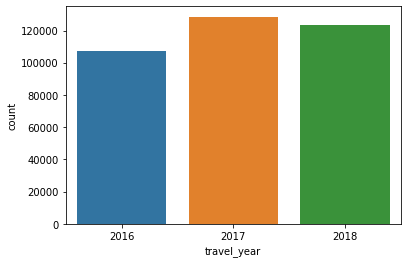

In [119]:
x = df['travel_year']
sns.countplot(x=x)
plt.show()

In [120]:
total_profit_per_year = df.groupby('travel_year')['profit'].sum()

In [121]:
total_profit_per_year

travel_year
2016    1.564051e+07
2017    1.860963e+07
2018    1.507756e+07
Name: profit, dtype: float64

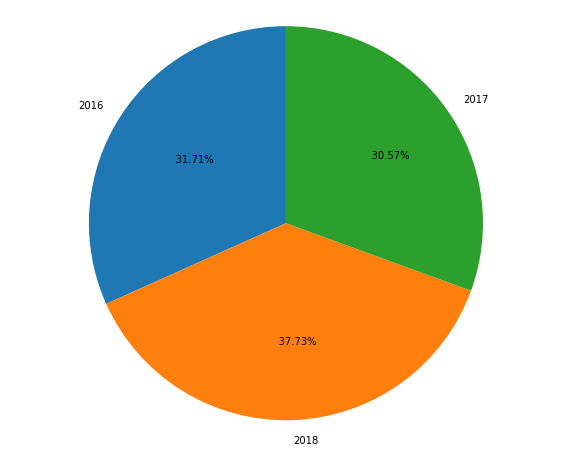

In [122]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
labels = df['travel_year'].unique()
ax1.pie(total_profit_per_year,labels=labels, autopct='%10.2f%%',startangle=90)
ax1.axis('equal') 
plt.show()

In [123]:
avg_profit_year_company = df.groupby(['travel_year','Company'])['profit'].mean()

In [124]:
avg_profit_year_company

travel_year  Company   
2016         Pink Cab       68.321819
             Yellow Cab    169.347821
2017         Pink Cab       67.070839
             Yellow Cab    168.817057
2018         Pink Cab       53.229689
             Yellow Cab    143.416122
Name: profit, dtype: float64

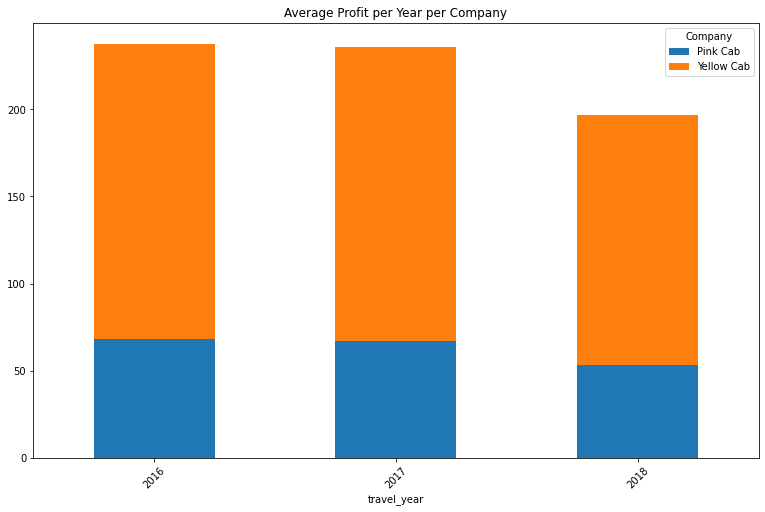

In [125]:
avg_profit_year_company = df.groupby(['travel_year','Company'])['profit'].mean().unstack();
avg_profit_year_company.plot(kind='bar', stacked=True,figsize=(13,8))
plt.title('Average Profit per Year per Company')
plt.xticks(rotation=45, ha='center')
plt.show()

In [126]:
profit_2016 = round ( df[(df['travel_year'] == 2016) & (df.Company == "Yellow Cab")]["profit"].sum() ,2)
profit_2017 = round ( df[(df['travel_year'] == 2017) & (df.Company == "Yellow Cab")]["profit"].sum() ,2)
profit_2018 = round ( df[(df['travel_year'] == 2018) & (df.Company == "Yellow Cab")]["profit"].sum() ,2)

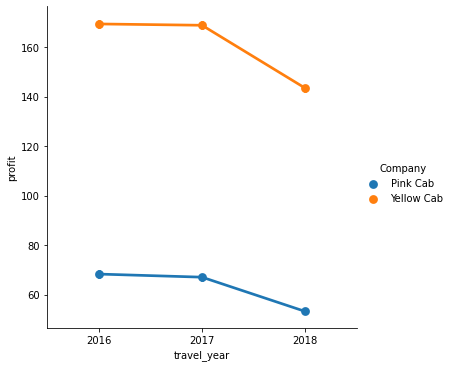

In [127]:
sns.catplot(x='travel_year', y='profit', data=df , hue='Company',kind='point')
plt.show()

After looking at above graphs , we should suggest Yellow Cab company for investment, as the profits of yellow cab are on the higher side than pink cab